In [3]:
!pip install pyforest

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15928 sha256=4f6a453d8348142d82786518f3473d1c5c3443c9f183eeb33bd7d3a35e053ca2
  Stored in directory: c:\users\mustafa\appdata\local\pip\cache\wheels\50\94\94\c8224da834a4db55f67c86feb7c742111ff051d5f3e17127d8
Successfully built pyforest


In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full content of each column
pd.set_option('display.width', 2000)

In [9]:
data = pd.read_csv('1. Weather Data.csv')
data.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [11]:
#Number of records and features
data.shape

(8784, 8)

In [13]:
#Number of records
records = len(data)
print(f'Number of records: {records}')

Number of records: 8784


In [15]:
#Number of features or columns
columns = data.shape[1]
print(f"Number of Featueres/Colummns: {columns}")

Number of Featueres/Colummns: 8


In [17]:
# Data types
print(data.dtypes)

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


In [22]:
#Null values
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [33]:
#Duplicate records
duplicate = data.duplicated().sum()
duplicate

0

In [34]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


There are no any significant outliers in the data 

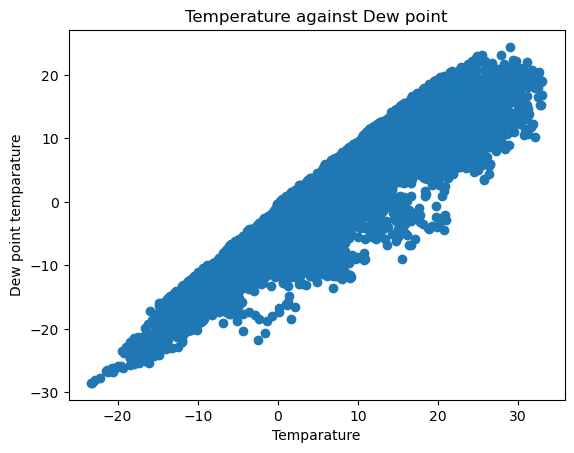

In [43]:
temp = data['Temp_C']
dew = data['Dew Point Temp_C']
plt.scatter(temp, dew)
plt.title('Temperature against Dew point')
plt.xlabel('Temparature')
plt.ylabel('Dew point temparature')
plt.show()

TypeError: 'str' object is not callable

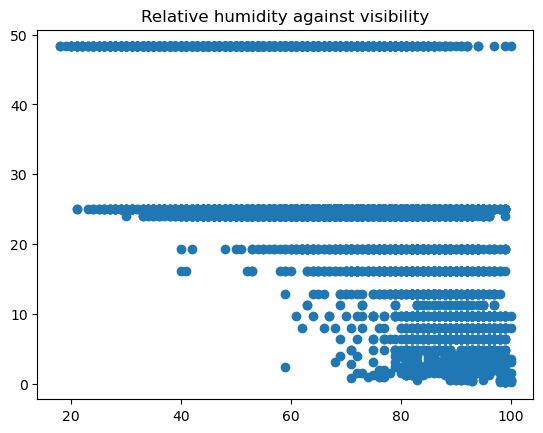

In [52]:
hum = data['Rel Hum_%']
vis = data['Visibility_km']
plt.scatter(hum, vis)
plt.title('Relative humidity against visibility')
plt.xlabel('Relative Humidity')
plt.ylabel('Visibility')
plt.show()

TypeError: 'str' object is not callable

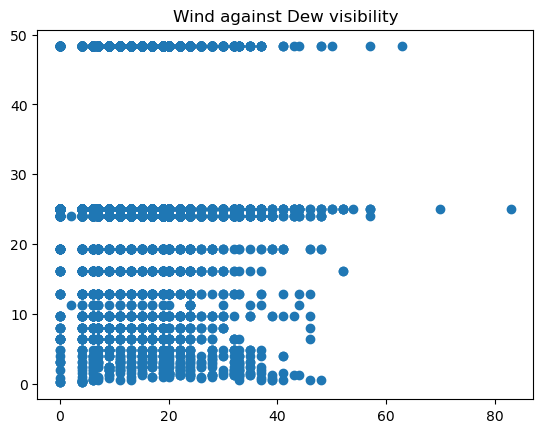

In [53]:
wind = data['Wind Speed_km/h']
vis = data['Visibility_km']
plt.scatter(wind, vis)
plt.title('Wind against Dew visibility')
plt.xlabel('Wind speed')
plt.ylabel('Visibility')
plt.show()

TypeError: 'str' object is not callable

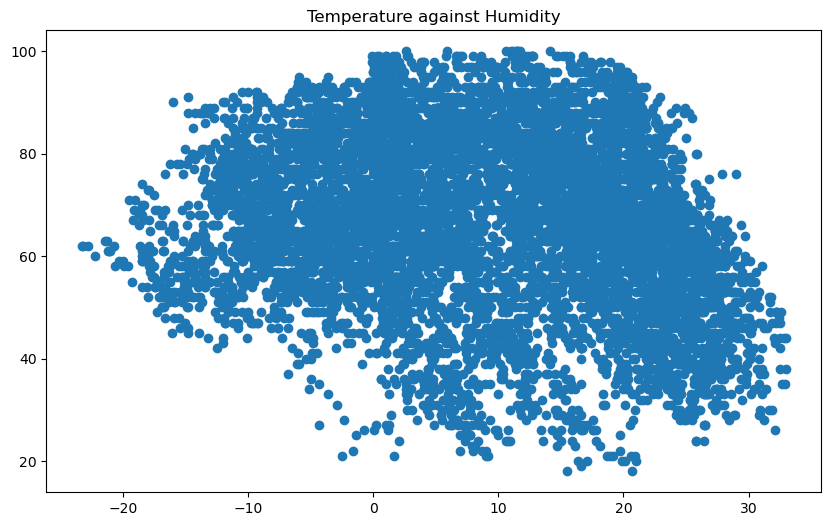

In [58]:
temp = data['Temp_C']
hum = data['Rel Hum_%']
plt.figure(figsize=(10,6))
plt.scatter(temp, hum)
plt.title('Temperature against Humidity')
plt.xlabel('Temparature')
plt.ylabel('humidity')
plt.show()

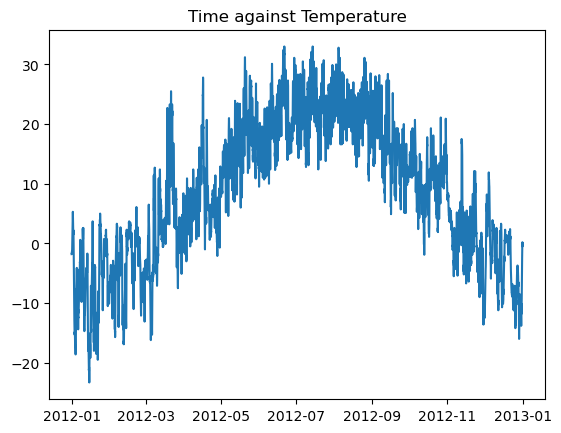

In [60]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
plt.plot(data['Date/Time'], data['Temp_C'])
plt.title('Time against Temperature')
plt.show()

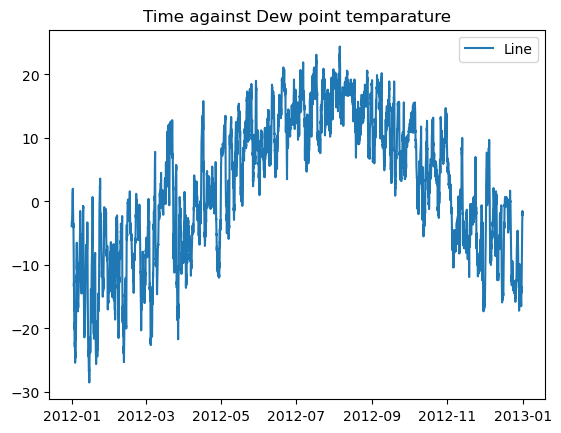

In [68]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
plt.plot(data['Date/Time'], data['Dew Point Temp_C'], label = 'Line')
plt.legend()
plt.title('Time against Dew point temparature')
plt.show()

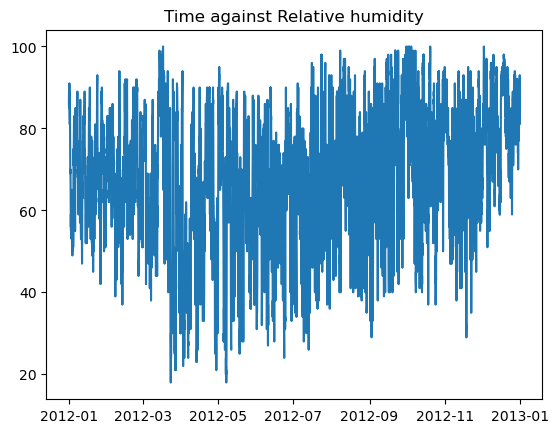

In [69]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
plt.plot(data['Date/Time'], data['Rel Hum_%'])
plt.title('Time against Relative humidity')
plt.show()

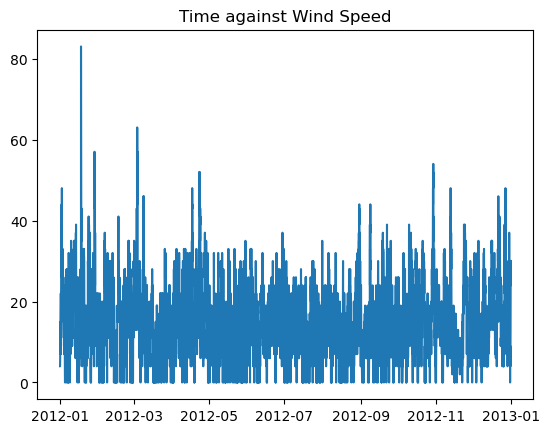

In [70]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
plt.plot(data['Date/Time'], data['Wind Speed_km/h'])
plt.title('Time against Wind Speed')
plt.show()

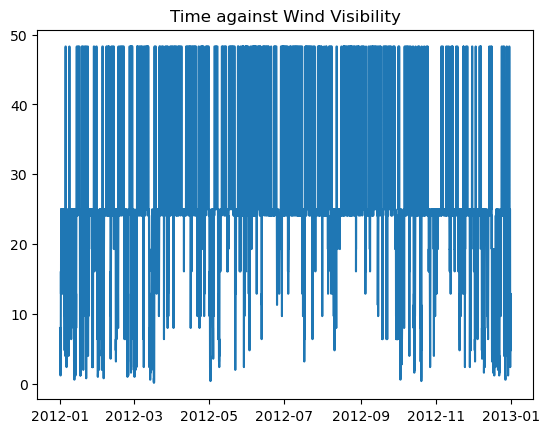

In [74]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
plt.plot(data['Date/Time'], data['Visibility_km'])
plt.title('Time against Wind Visibility')
plt.show()

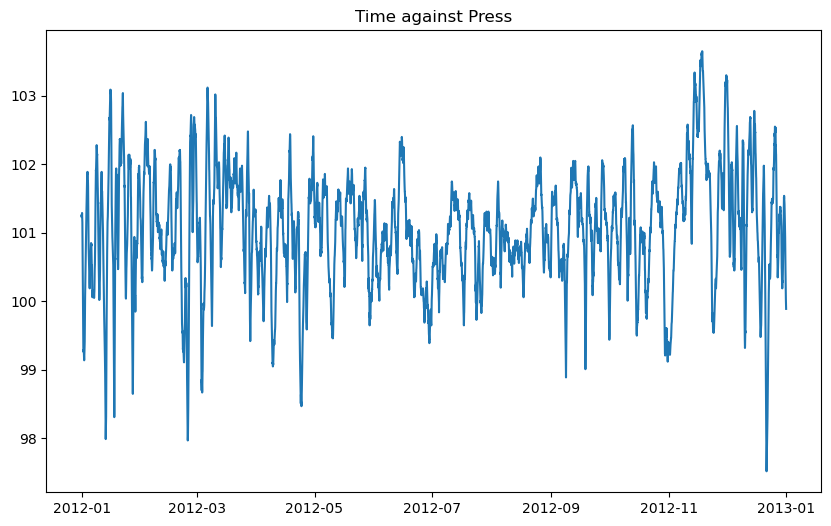

In [76]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
plt.figure(figsize=(10,6))
plt.plot(data['Date/Time'], data['Press_kPa'])
plt.title('Time against Press')
plt.show()

In [80]:
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()
print(corr_matrix)

                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  Press_kPa
Temp_C            1.000000          0.932714  -0.220182        -0.061876       0.273455  -0.236389
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685       0.050813  -0.320616
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743      -0.633683  -0.231424
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000       0.004883  -0.356613
Visibility_km     0.273455          0.050813  -0.633683         0.004883       1.000000   0.231847
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613       0.231847   1.000000


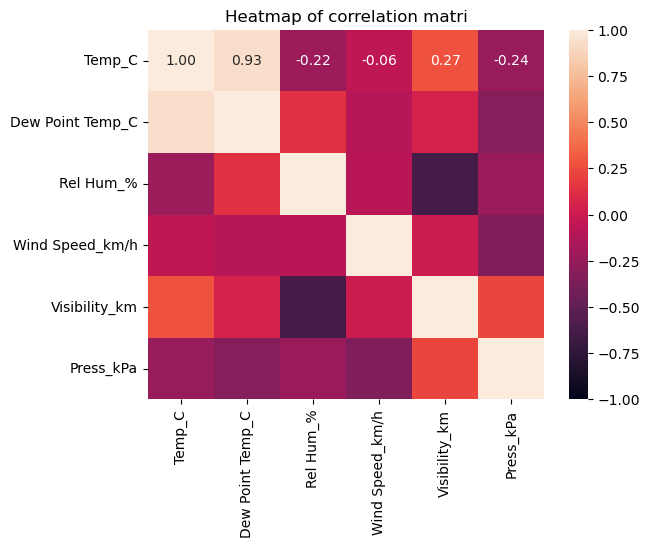

In [81]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of correlation matri')
plt.show()